# `check_shift.ipynb`

## Introduction

This notebook aims at vizualizing the effects of misaligned field magnitudes with respect to their respective Fourier transform magnitudes.

This scenario is most likely to happen when dealing with experimental records.

## Imports and synthetic data loading (speckle)

Load libraries

In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import speckleret

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load pre-computed example speckle field (computed from a GRIN fiber simulation) and compute its Fourier transform

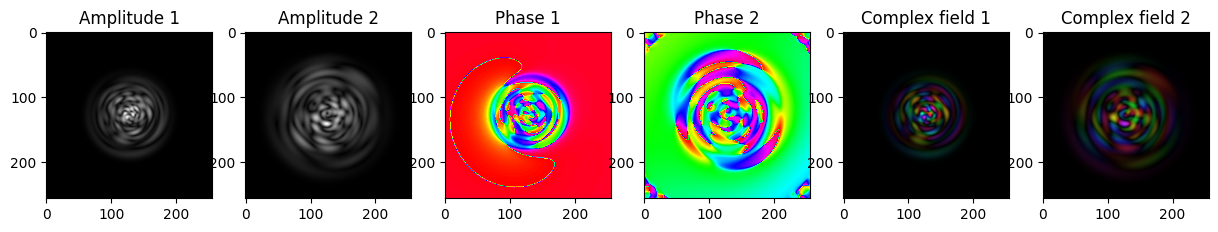

In [16]:
field = np.load('../imports/grin_speckle_example.npy')
ft_field = speckleret.transforms.fourier_transform(field, pad=2)
_ = speckleret.plots.compare_complex_fields(field, ft_field)

## Run phase retrieval on the computed fields

Let's first generate the support constraint from thresholding and visualize the support

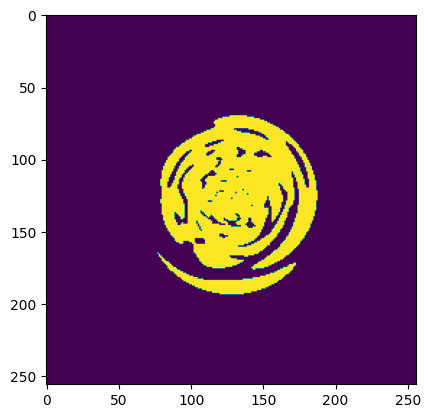

In [17]:
support = speckleret.supports.threshold_support(field, threshold=0.01)
plt.imshow(support)
plt.show()

Let's now attempt to retreieve the phase of tha field from the field magnitude and the Fourier magnitude using HIO + ER

In [18]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(field), np.abs(ft_field)), support, pad=2, max_iter=1, max_er_iter=200, max_hio_iter=100)

1 / 1


Let's visualize the convergence results, that is the Fourier magnitude simularity across iterations and the complex dot product between the iterate and the groundtruth

Quality: 0.9890665218677133
Pearson: 0.9999999999999999


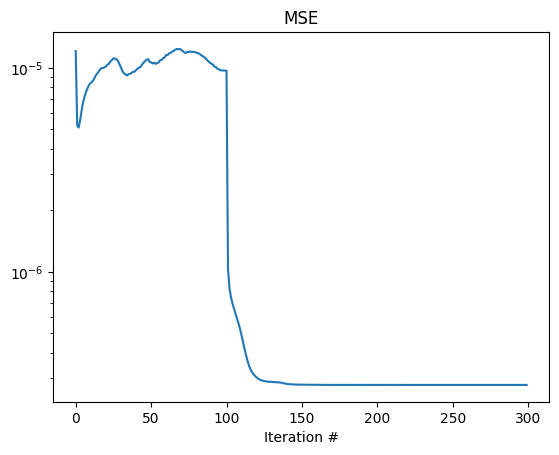

In [19]:
print(f"Quality: {speckleret.metrics.quality(y_hat[support], field[support])}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat[support], field[support])}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

Let's visualize the retrieved field

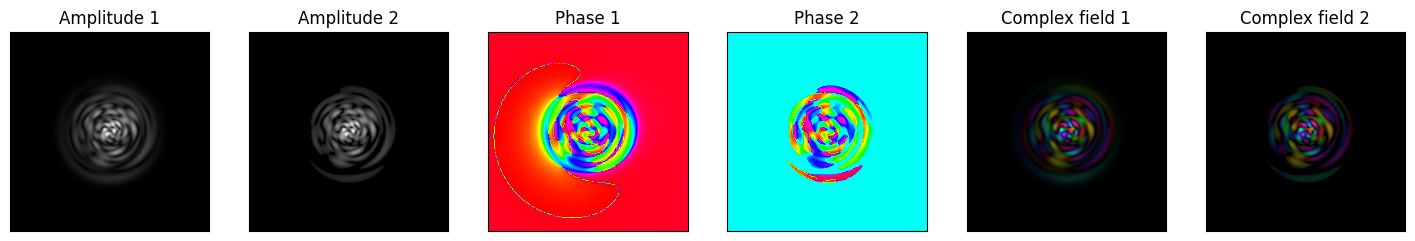

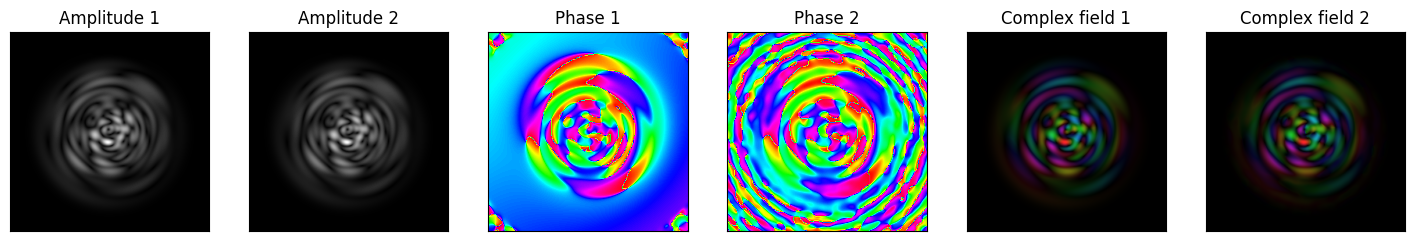

In [20]:
_ = speckleret.plots.compare_complex_fields(field, y_hat, remove_ticks=True, figsize=(18,9))
_ = speckleret.plots.compare_complex_fields(ft_field, ft_hat, remove_ticks=True, figsize=(18,9))

And finally the phase difference on the support, which should have an almost flat color

Phase error:
  - Mean: -1.21999 rad
  - Std: 0.14333 rad


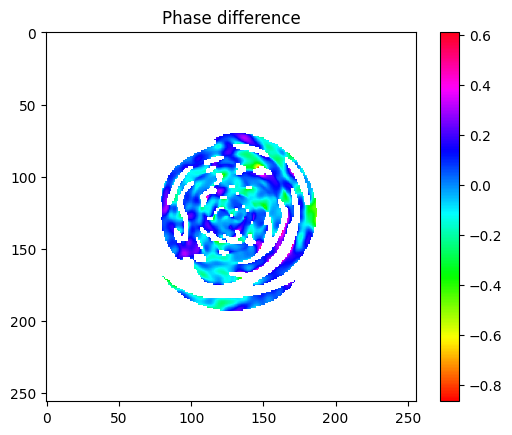

In [21]:
speckleret.plots.phase_difference(y_hat, field, support)

## Run phase retrieval on the shifted object field and the computed Fourier magnitude

Generate the shifted object field

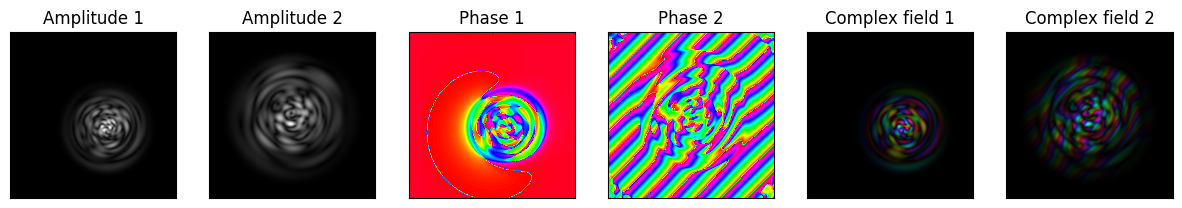

In [23]:
shift = (20, 20)
field_with_shift = np.roll(field, shift=shift, axis=(0,1))
ft_from_shifted_field = speckleret.transforms.fourier_transform(field_with_shift, pad=2)
_ = speckleret.plots.compare_complex_fields(field_with_shift, ft_from_shifted_field, remove_ticks=True)

Generate the support of the shifted object field

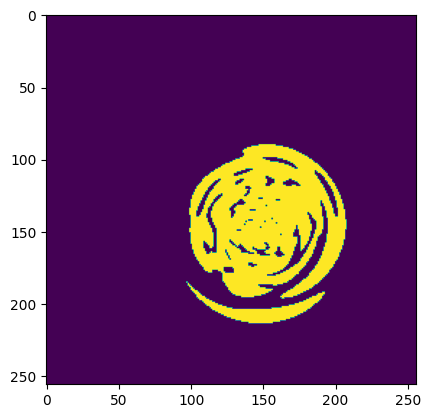

In [25]:
support = speckleret.supports.threshold_support(field_with_shift, threshold=0.01)
plt.imshow(support)
plt.show()

Phase retrieval from the shifted field magnitude and the Fourier magnitude using HIO + ER

In [26]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(field_with_shift), np.abs(ft_field)), support, pad=2, max_iter=1, max_er_iter=200, max_hio_iter=100)

1 / 1


Convergence visualization

Quality: 0.9890662918037232
Pearson: 1.0


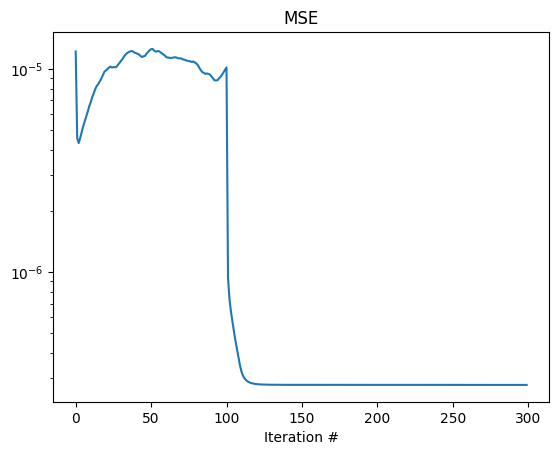

In [27]:
print(f"Quality: {speckleret.metrics.quality(y_hat[support], field_with_shift[support])}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat[support], field_with_shift[support])}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

Retrieved field visualization

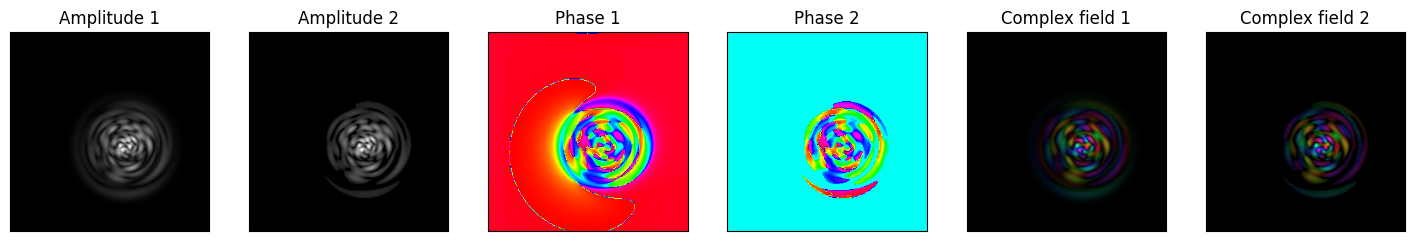

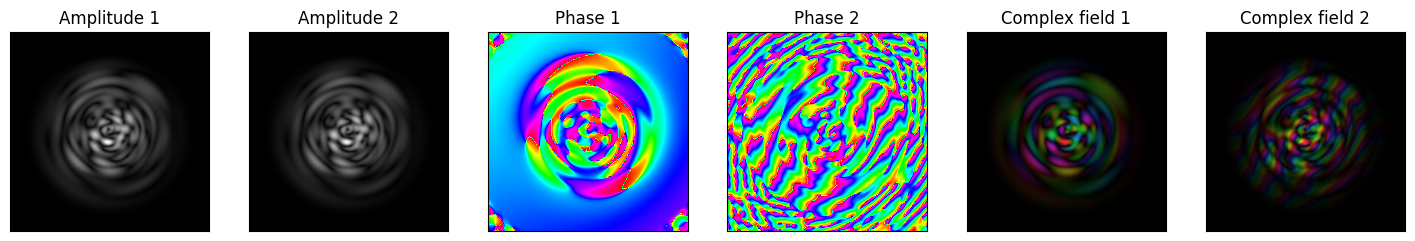

In [28]:
_ = speckleret.plots.compare_complex_fields(field_with_shift, y_hat, remove_ticks=True, figsize=(18,9))
_ = speckleret.plots.compare_complex_fields(ft_field, ft_hat, remove_ticks=True, figsize=(18,9))

Phase difference between the object field with the retrieved field: it should be small since the shift is compensated with a phase slope in the FT plane

Phase error:
  - Mean: 0.35137 rad
  - Std: 0.14333 rad


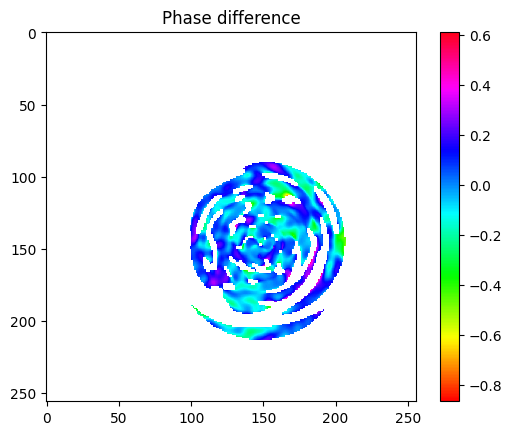

In [32]:
speckleret.plots.phase_difference(y_hat, field_with_shift, support)

Phase difference between the retrieved FT and the computed FT: It should depict a slope

Phase error:
  - Mean: 0.00525 rad
  - Std: 1.82386 rad


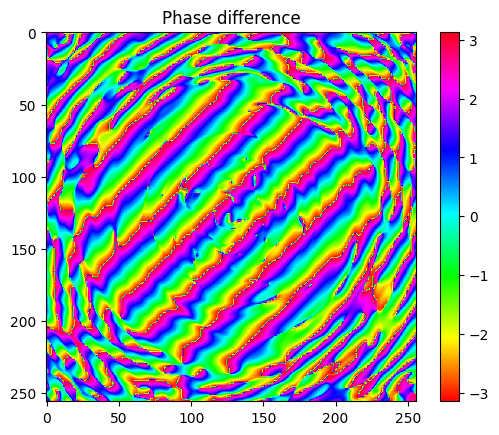

In [33]:
speckleret.plots.phase_difference(ft_hat, ft_field)

## Run phase retrieval on the object field and the shifted Fourier magnitude

Generate the shifted Fourier magnitude

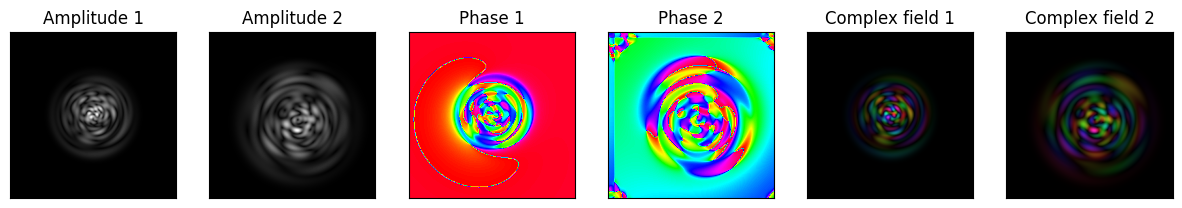

In [35]:
shift = (10, 10)
ft_field_with_shift = np.roll(ft_field, shift=shift, axis=(0,1))
_ = speckleret.plots.compare_complex_fields(field, ft_field_with_shift, remove_ticks=True)

Generate the support of the object field

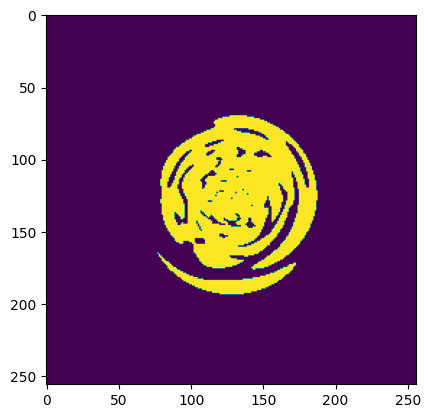

In [36]:
support = speckleret.supports.threshold_support(field, threshold=0.01)
plt.imshow(support)
plt.show()

Phase retrieval from the field magnitude and the shifted Fourier magnitude using HIO + ER

In [37]:
y_hat, ft_hat, results = speckleret.retrieval.hio_er_fourier((np.abs(field), np.abs(ft_field_with_shift)), support, pad=2, max_iter=1, max_er_iter=200, max_hio_iter=100)

1 / 2
2 / 2


Convergence visualization

Quality: 0.028438779818138044
Pearson: 1.0000000000000002


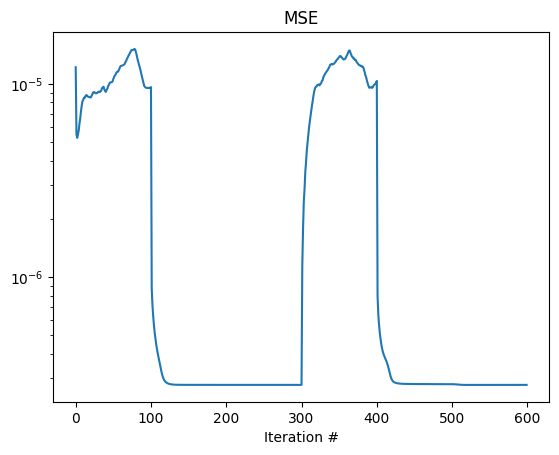

In [38]:
print(f"Quality: {speckleret.metrics.quality(y_hat[support], field[support])}")
print(f"Pearson: {speckleret.metrics.pearson(y_hat[support], field[support])}")

plt.figure()
plt.plot(results['mse_plane2'], label='Fourier MSE')
plt.title('MSE')
plt.xlabel('Iteration #')
plt.yscale('log')

Retrieved field visualization

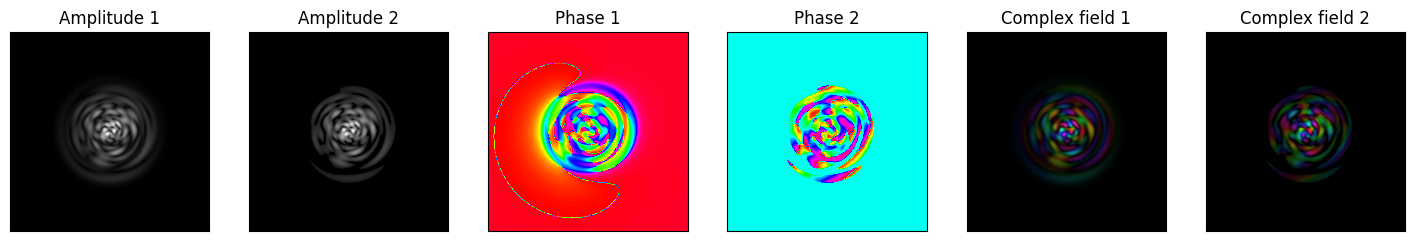

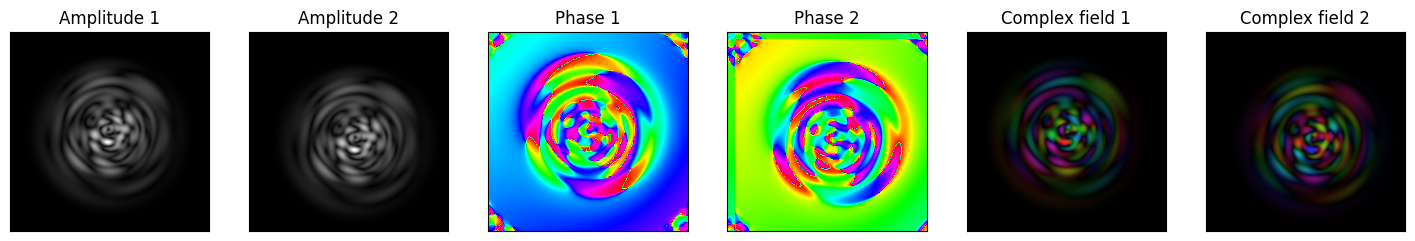

In [40]:
_ = speckleret.plots.compare_complex_fields(field, y_hat, remove_ticks=True, figsize=(18,9))
_ = speckleret.plots.compare_complex_fields(ft_field, ft_field_with_shift, remove_ticks=True, figsize=(18,9))

Phase difference between the object field with the retrieved field: it should depict a slope 

Phase error:
  - Mean: -0.06128 rad
  - Std: 1.78459 rad


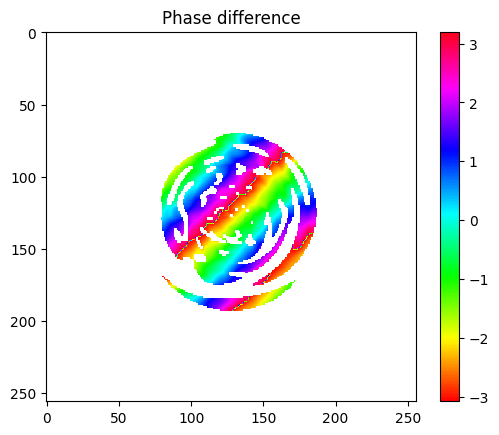

In [41]:
speckleret.plots.phase_difference(y_hat, field, support)

Phase difference between the retrieved FT and the computed FT: it should be small since the slope in the object field compensates for the shift

Phase error:
  - Mean: -1.11437 rad
  - Std: 1.80934 rad


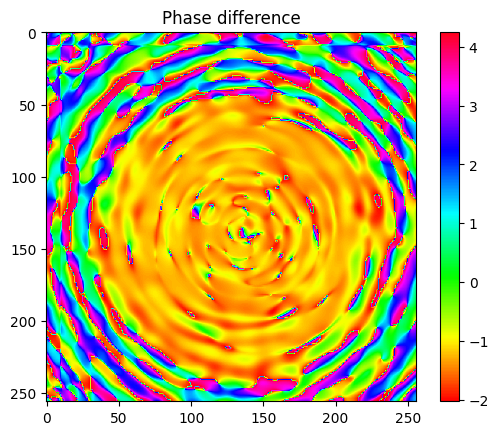

In [43]:
speckleret.plots.phase_difference(ft_hat, ft_field_with_shift)